See resources here: https://realpython.com/playing-and-recording-sound-python/

In [1]:
filename = '/Users/othrif/spectrum/voice/datasets/free-spoken-digit-dataset/recordings/4_yweweler_5.wav'

# Play in CLI
From `sox`: 
``` bash 
play existing-file.wav
```

# Play sound in Jupyter

In [7]:
import IPython.display as ipd
ipd.Audio(filename)

### Play mp3 in Jupyter and load with `librosa`

In [3]:
# common imports
import IPython.display as ipd
import librosa
import warnings
warnings.filterwarnings('ignore')

newfile='/Users/othrif/spectrum/voice/learning/simple_audio/test/test.mp3'
ipd.display(ipd.Audio(newfile))
sound,sr = librosa.load(newfile)

# Play sound with `pydub`
Some useful details [here](https://github.com/jiaaro/pydub/blob/master/API.markdown)

In [30]:
from pydub import AudioSegment
from pydub.playback import play

sound = AudioSegment.from_file(filename, 'wav')
play(sound)

In [31]:
from pydub import AudioSegment
from pydub.playback import play

# Play wav
sound = AudioSegment.from_wav(filename)
play(sound)

# Play mp3
sound = AudioSegment.from_mp3('/Users/othrif/spectrum/voice/learning/simple_audio/test/test.mp3')
play(sound)

# Play sound with `sounddevice`
read a WAV file as a NumPy array and play it back   
Interesting examples here: https://python-sounddevice.readthedocs.io/en/latest/examples.html#plot-microphone-signal-s-in-real-time

In [15]:
import sounddevice as sd
import soundfile as sf

# Extract data and sampling rate from file
data, fs = sf.read(filename, dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

# Play and plot sound using `wave`

Number of channels: 1
Frame rate: 8000 Hz
Sample width: 2 * 8 bits
Length: 0.333875 s


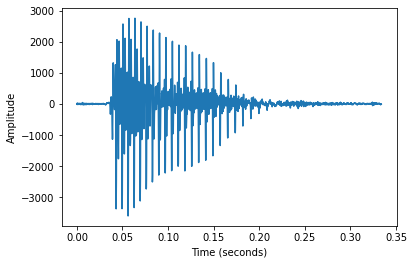

In [3]:
import wave 
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd

wav_file = wave.open(filename, 'r')
audio_signal = wav_file.readframes(-1)
soundwave = np.frombuffer(audio_signal, dtype='int16')

nchannels=wav_file.getnchannels()
framerate=wav_file.getframerate()
width=wav_file.getsampwidth()
nframes=wav_file.getnframes()

# Audio parameters
print(f'Number of channels: {nchannels}')
print(f'Frame rate: {framerate} Hz')
print(f'Sample width: {width} * 8 bits')
print(f'Length: {nframes/framerate} s')

display(ipd.Audio(soundwave, rate=framerate))
time = np.linspace(start=0, stop=len(soundwave)/framerate, num=len(soundwave))
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
plt.plot(time, soundwave)
plt.show()